In [2]:
# Import Simulation Class
import sys
sys.path.append('..')  # Add parent directory to the system path
from ESR_STM_SpinSimulation import SpinSys
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
# Define the Spin System
Spins=[1,0.5]
S = SpinSys(Spins)
S.B=[0,0,0.5]
S.BTip=[1e-9,0,0]
S.tip='f'
S.TipPolarization=[0,0,0.8]
S.T=0.5
S.Jvector=np.array([[14.65,14.65,14.65]])
S.Dvector=np.array([-1.9,0])
S.AtomPositions=np.array([[0,0,0],[2,1,0]])
S.DipoleBool=[True]
S.V_DC=-100

Basic Spin Calculations

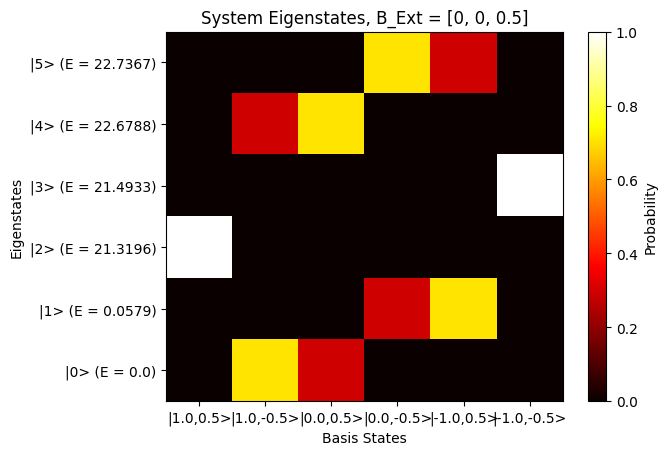

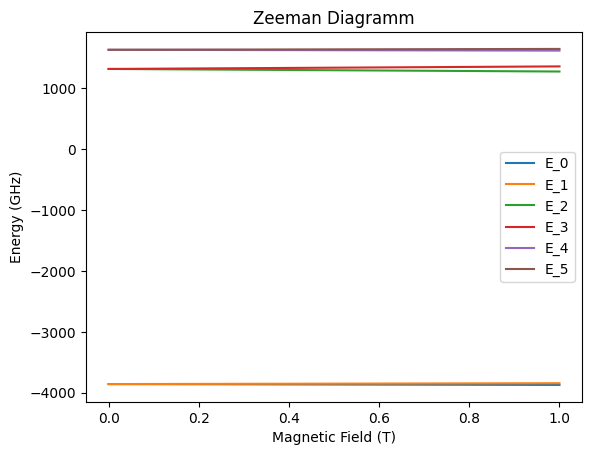

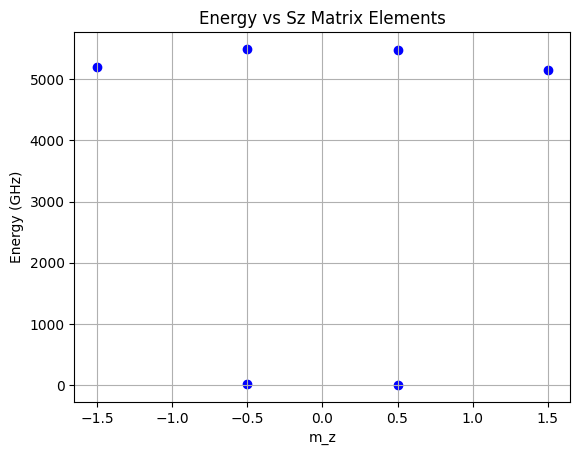

Spin System Parameters:
Number of Spins: 2
Dimension of Matrix: 6
Readout Spin: 0
Atom Positions: 
[[0 0 0]
 [2 1 0]]
Temperature (T): 0.5 K
External Magnetic Field (B): [0, 0, 0.5] T
Tip Magnetic Field (BTip): [1e-09, 0, 0] T
Tip Field Gradient (BTipGradient): [0, 0, 0] T
Tip Type: f
g-factor Vector: [2.0, 2.0]
Out of Plane Anisotropy (Dvector): [-1.9  0. ] meV
In Plane Anisotropy (Evector): [0. 0.] meV
Dipole Interaction Matrix (D0): 
[[0.         0.19503484]
 [0.         0.        ]] GHz
Dipole Interaction Bool Array (DipoleBool): [True]
Exchange Interaction Vector (Jvector): 
[[14.65 14.65 14.65]] meV
Exchange Interaction Vector (Jvector): 
[[3542.3528379 3542.3528379 3542.3528379]] GHz

Tunneling Parameters:
DC Voltage (V_DC): -100 mV
Tip Polarization: [0, 0, 0.8]
Sample Polarization: [0, 0, 0]
U: [0. 0.]
b0: 0
Conductance (G): 1e-09 A/V
Sample-Sample Conductance (G_ss): [1e-08, 1e-08] A/V
Tip-Tip Scattering Contribution (G_tt): 0


array(['|0> (E = 0.0) = (-0.8386350043577132+0.00914918596083037j)|1.0,-0.5>+(0.5445845420466999-0.005941208297637205j)|0.0,0.5>',
       '|1> (E = 0.0579) = +(0.5032109459506507+0.6709479279342009j)|-1.0,0.5>(-0.32677016954209176-0.4356935593894556j)|0.0,-0.5>',
       '|2> (E = 21.3196) = +(0.9999998715703459+0j)|1.0,0.5>+(0.00024763435002399145+0.00033017913336532193j)|0.0,-0.5>+(0.00017648391925326667+0.00023531189233768886j)|-1.0,0.5>',
       '|3> (E = 21.4933) = +(0.5997823377239679+0.8001629712717142j)|-1.0,-0.5>+(0.0004957817342008733+1.3480932212368958e-07j)|0.0,0.5>+(0.00034779367310905417+9.456949717601488e-08j)|1.0,-0.5>',
       '|4> (E = 22.6788) = (-0.8386365460253814-0.008993135094243949j)|0.0,0.5>(-0.54458552751698-0.005839873354603777j)|1.0,-0.5>+(0.00035791876562669576+0.00048804119508119364j)|-1.0,-0.5>',
       '|5> (E = 22.7367) = +(0.5032108851909517+0.6709478469212692j)|0.0,-0.5>+(0.32677012214839596+0.43569349619786135j)|-1.0,0.5>(-0.0005063388770591389+0j)|1.

In [4]:
S.calcSpinOperators()
S.calcEigEnergies()
S.calcEigStates()
S.showEigenMatrix('p')
#S.plotEnergyVsSz()
S.plotZeemanDiagramm(Brange=[0,1],N=100)
S.plotEnergyVsSz()
S.print_parameters()
S.states

### Calculating the Populations for Given Parameters

In [5]:
# Setting the tunneling Parameters
S.B=[0,0,0.5]
S.calcEigEnergies()
S.calcEigStates()
S.G_ss = [1,1]
S.G = 1e-3
S.V_DC = 0
S.T = 0.5
S.TipPolarization = [0, 0, 0.8]
S.U = [0,0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering
S.calcRates()
#S.calcIETS(Vrange=100,N=501,AllowPumping=True)

print(f"VDC: {S.V_DC:.0f}mV")
print(f"------------")
print(f"p0: {S.Populations[0] * 100:.2f}%")
print(f"p1: {S.Populations[1] * 100:.2f}%")
print(f"p2: {S.Populations[2] * 100:.2f}%")
print(f"p3: {S.Populations[3] * 100:.2f}%")
print(f"p4: {S.Populations[4] * 100:.2f}%")
print(f"p5: {S.Populations[5] * 100:.2f}%")
print(S.G/S.G_ss[0])

VDC: 0mV
------------
p0: 79.30%
p1: 20.70%
p2: -0.00%
p3: -0.00%
p4: -0.00%
p5: -0.00%
0.001


c:\Users\philou\Desktop\ESR-Simulation\EfieldPaper_SpinPumpingExplanation\..\ESR_STM_SpinSimulation.py:716: RuntimeWarning: invalid value encountered in scalar divide
  RateIntegrals[i, j] = abs(delta_E / (np.exp(delta_E / (self.kB * self.T)) - 1))


### Pumping with a Voltage

C:\Users\philou\AppData\Local\Temp\ipykernel_24488\3153716228.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


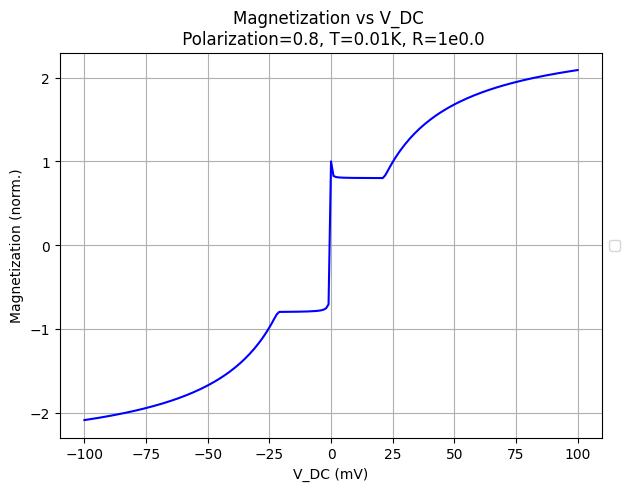

C:\Users\philou\AppData\Local\Temp\ipykernel_24488\3153716228.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


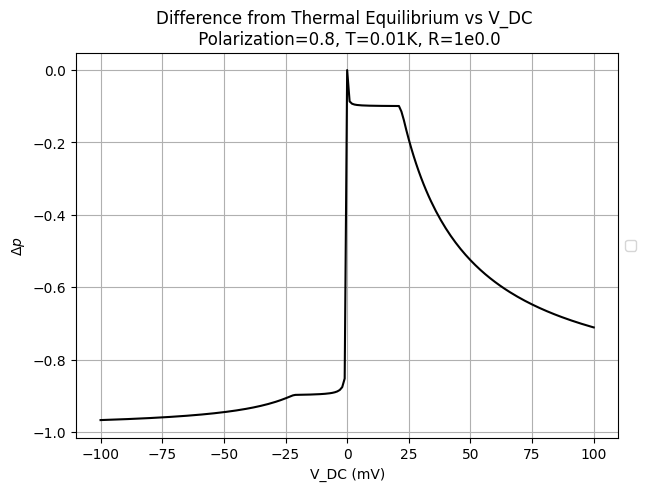

C:\Users\philou\AppData\Local\Temp\ipykernel_24488\3153716228.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


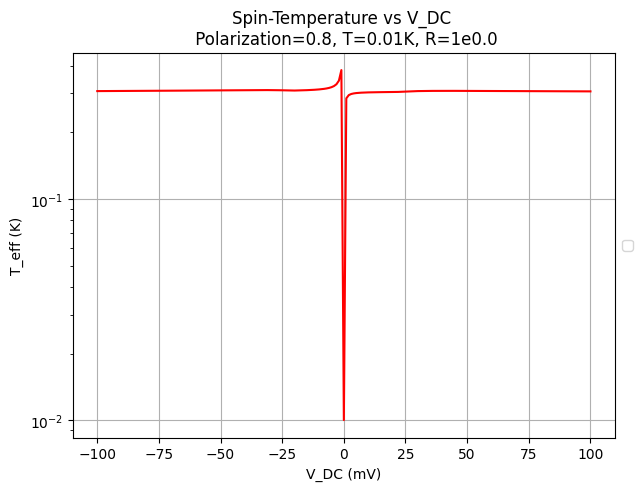

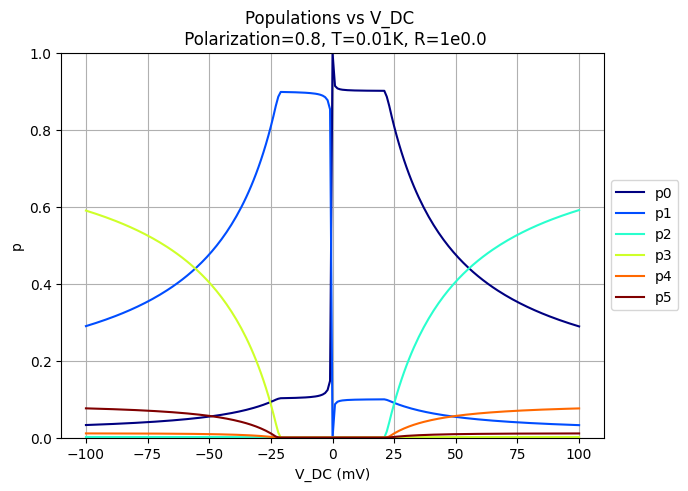

In [43]:
# Setting the tunneling Parameters
S.B=[0,0,0.5]
S.calcEigEnergies()
S.calcEigStates()
S.G_ss = [1,1]
S.G = 1
S.V_DC = -100
S.T = 0.01
S.TipPolarization = [0, 0, 0.8]
S.U = [0,0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering
S.calcRates()

# Initialize the arrays
N=201
V_range=np.linspace(-100,100,N)
P0=np.zeros(N)
P1=np.zeros(N)
P2=np.zeros(N)
P3=np.zeros(N)
P4=np.zeros(N)
P5=np.zeros(N)
M=np.zeros(N)
thermal_diff=np.zeros(N)
T_eff=np.zeros(N)

# Calculating 
for i in range(len(V_range)):
    S.V_DC = V_range[i]
    S.calcRates()
    S.calcMagnetization()
    #M[i] = (S.Populations[0] - S.Populations[1])
    M[i] = S.Mag
    thermal_diff[i] = -(S.p0[0] - S.Populations[0])
    T_eff[i] = S.E_All[1]/(S.kB*np.log(S.Populations[0]/S.Populations[1]))
    P0[i] = S.Populations[0]
    P1[i] = S.Populations[1]
    P2[i] = S.Populations[2]
    P3[i] = S.Populations[3]
    P4[i] = S.Populations[4]
    P5[i] = S.Populations[5]


# Plotting the Magnetization 
plt.figure(figsize=(7, 5))
plt.plot(V_range, M, color='b')
#plt.ylim([-1, 1])
plt.title(f'Magnetization vs V_DC \n Polarization={S.TipPolarization[2]}, T={S.T}K, R=1e{np.log10(S.G/S.G_ss[0])}')
plt.xlabel('V_DC (mV)')
plt.ylabel('Magnetization (norm.)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Plotting the Difference in the thermal populations
plt.figure(figsize=(7, 5))
plt.plot(V_range, thermal_diff, color='k')
#plt.ylim([-1, 1])
plt.title(f'Difference from Thermal Equilibrium vs V_DC \n Polarization={S.TipPolarization[2]}, T={S.T}K, R=1e{np.log10(S.G/S.G_ss[0])}')
plt.xlabel('V_DC (mV)')
plt.ylabel(r'$\Delta p$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Plotting the Effective Temperature
plt.figure(figsize=(7, 5))
plt.plot(V_range, np.abs(T_eff), color='r')
#plt.ylim([-1, 1])
plt.title(f'Spin-Temperature vs V_DC \n Polarization={S.TipPolarization[2]}, T={S.T}K, R=1e{np.log10(S.G/S.G_ss[0])}')
plt.xlabel('V_DC (mV)')
plt.ylabel('T_eff (K)')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Plotting the Populations
colors = plt.cm.jet(np.linspace(0, 1, S.dimensionOfMatrix))[:, :3]
plt.figure(figsize=(7, 5))
plt.plot(V_range, P0, color=colors[0], label=f'p0')
plt.plot(V_range, P1, color=colors[1], label=f'p1')
plt.plot(V_range, P2, color=colors[2], label=f'p2')
plt.plot(V_range, P3, color=colors[3], label=f'p3')
plt.plot(V_range, P4, color=colors[4], label=f'p4')
plt.plot(V_range, P5, color=colors[5], label=f'p5')
#plt.plot(V_range, np.abs(T_eff), color='k')
#plt.plot(V_range, np.abs(T_eff), color='r')
plt.ylim([0, 1])
plt.title(f'Populations vs V_DC \n Polarization={S.TipPolarization[2]}, T={S.T}K, R=1e{np.log10(S.G/S.G_ss[0])}')
plt.xlabel('V_DC (mV)')
plt.ylabel('p')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()
# Find the index of the maximum P0
max_P0_index = np.argmax(P0)

# Get the corresponding value of V_range
max_P0_V_range = V_range[max_P0_index]

#print(f"Index of maximum P0: {max_P0_index}")
#print(f"Corresponding value of V_range: {max_P0_V_range}")

In [44]:
S.states

array(['|0> (E = 0.0) = (-0.8386350043577132+0.00914918596083037j)|1.0,-0.5>+(0.5445845420466999-0.005941208297637205j)|0.0,0.5>',
       '|1> (E = 0.0579) = +(0.5032109459506507+0.6709479279342009j)|-1.0,0.5>(-0.32677016954209176-0.4356935593894556j)|0.0,-0.5>',
       '|2> (E = 21.3196) = +(0.9999998715703459+0j)|1.0,0.5>+(0.00024763435002399145+0.00033017913336532193j)|0.0,-0.5>+(0.00017648391925326667+0.00023531189233768886j)|-1.0,0.5>',
       '|3> (E = 21.4933) = +(0.5997823377239679+0.8001629712717142j)|-1.0,-0.5>+(0.0004957817342008733+1.3480932212368958e-07j)|0.0,0.5>+(0.00034779367310905417+9.456949717601488e-08j)|1.0,-0.5>',
       '|4> (E = 22.6788) = (-0.8386365460253814-0.008993135094243949j)|0.0,0.5>(-0.54458552751698-0.005839873354603777j)|1.0,-0.5>+(0.00035791876562669576+0.00048804119508119364j)|-1.0,-0.5>',
       '|5> (E = 22.7367) = +(0.5032108851909517+0.6709478469212692j)|0.0,-0.5>+(0.32677012214839596+0.43569349619786135j)|-1.0,0.5>(-0.0005063388770591389+0j)|1.

### Effect of the Energy Splitting

In [ ]:
# Setting the tunneling Parameters
S.G_ss = [1]
S.G = 1e3
S.V_DC = -100
S.T = 0.5
S.TipPolarization = [0, 0, 0.8]
S.U = [0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

S.calcRates()

#print(f"Polarization: {S.TipPolarization[2]:.1f}")
print(f"VDC: {S.V_DC:.0f}mV")
print(f"------------")
print(f"p0: {S.Populations[0] * 100:.2f}%")
print(f"p1: {S.Populations[1] * 100:.2f}%")
print(S.G/S.G_ss[0])
S.calcIETS(Vrange=100,AllowPumping=True);

### Magnetization vs Conductance Ratio 

<Figure size 1000x500 with 0 Axes>

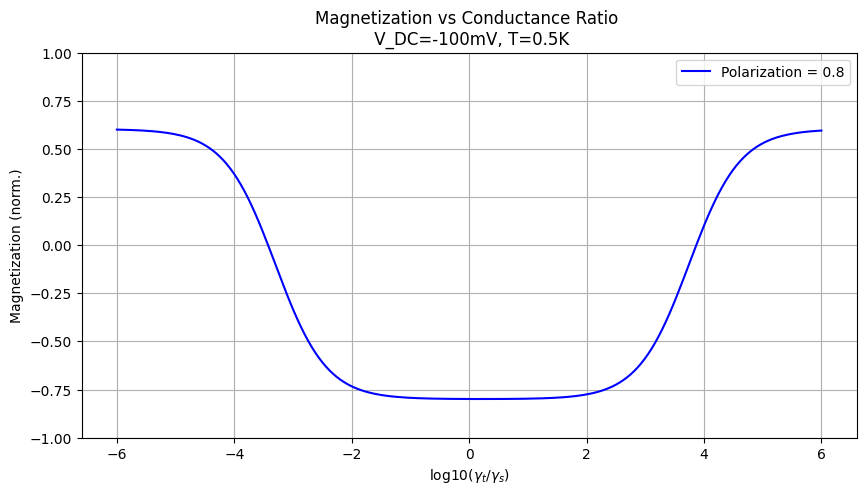

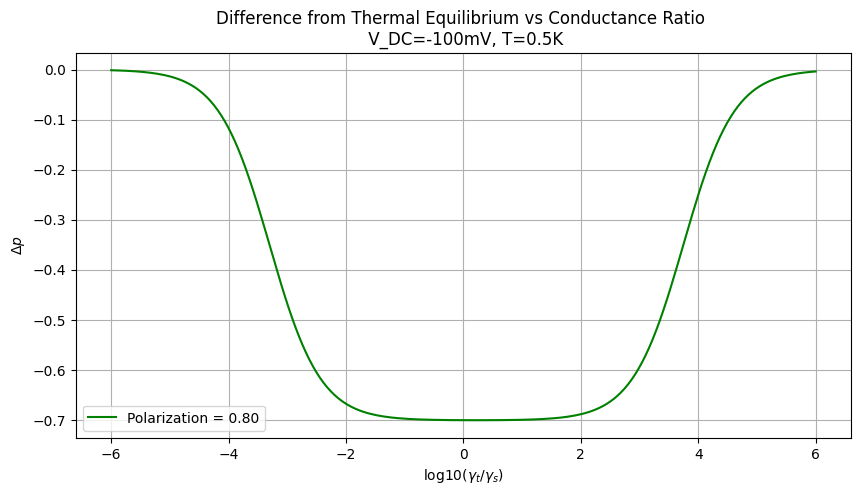

In [372]:
# Plot the Magnetization as a function of the conductance ratio 

# Setting the tunneling Parameters
S.G_ss = [1,1]
S.V_DC = -100
S.T = 0.5
#S.TipPolarization = [0, 0, 0.8]
S.U = [0,0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

# Initializing the Arrays
N=200
R_exponent=np.linspace(-6,6,N)
polarizations = [0.8]
M = np.zeros((len(polarizations),len(R_exponent)))
thermal_diff = np.zeros((len(polarizations),len(R_exponent)))

# Get the Spectral colormap


# Generate a list of n colors from the colormap
cmap = plt.get_cmap('Spectral_r')
cmap2 = plt.get_cmap('Blues')
#color_list = [cmap(i / (len(polarizations) - 1)) for i in range(len(polarizations))]
#color_list_blues = [cmap2(i / (len(polarizations) - 1)) for i in range(len(polarizations))]

plt.figure(figsize=(10, 5))
for i, pol in enumerate(polarizations):
    S.TipPolarization = [0, 0, pol]
    for g in range(len(R_exponent)):
        S.G = 10**R_exponent[g]*S.G_ss[0]
        S.calcRates()
        M[i,g] = (S.Populations[0] - S.Populations[1])
        thermal_diff[i,g] = -(S.p0[0] - S.Populations[0])
    

# Plot the Magnetization over the conductance Ratio
plt.figure(figsize=(10, 5))
for i in range(len(polarizations)):
    plt.plot(R_exponent, M[i], label=f'Polarization = {polarizations[i]:.1f}', color='b')
plt.ylim([-1, 1])
plt.title(f'Magnetization vs Conductance Ratio \n V_DC={S.V_DC}mV, T={S.T}K')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel('Magnetization (norm.)')
plt.legend()
plt.grid()
plt.show()

# Plotting the Difference of thermal Population for different Temperatures
plt.figure(figsize=(10, 5))
for i in range(len(polarizations)):
    plt.plot(R_exponent, thermal_diff[i], label=f'Polarization = {polarizations[i]:.2f}', color='g')
    #plt.fill_between(R_exponent, thermal_diff[i], 0, color=color_list[i], alpha=0.1)
plt.title(f'Difference from Thermal Equilibrium vs Conductance Ratio \n V_DC={S.V_DC}mV, T={S.T}K')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel(r'$\Delta p$')
plt.legend()
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

### Magnetization for Different Tip Polarizations

c:\Users\philou\Desktop\ESR-Simulation\EfieldPaper_SpinPumpingExplanation\..\ESR_STM_SpinSimulation.py:714: RuntimeWarning: overflow encountered in exp
  RateIntegrals[i, j] = abs((delta_E + V_DC) / (np.exp((delta_E + V_DC) / (self.kB * self.T)) - 1))


<Figure size 1000x500 with 0 Axes>

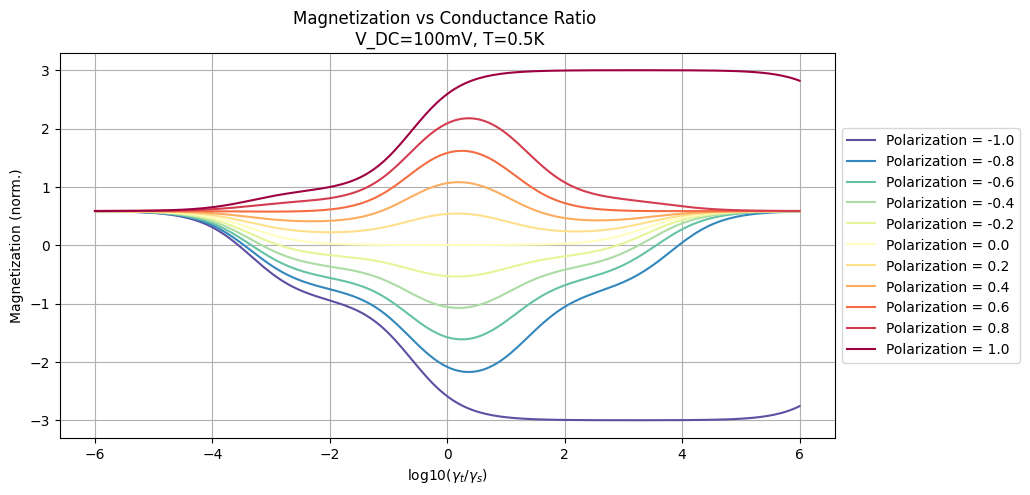

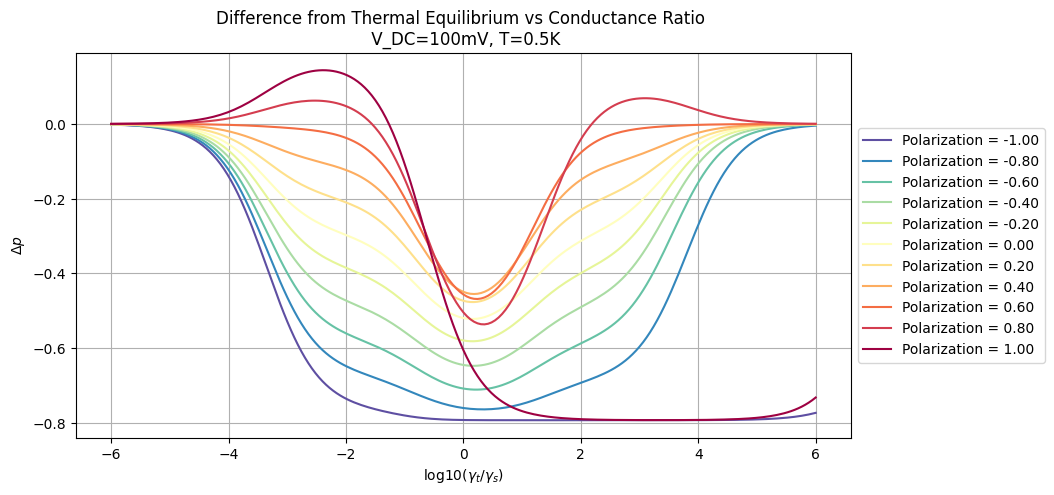

In [15]:
# Plot the Magnetization as a function of the conductance ratio at -100mV, for several tip polarizations

# Setting the tunneling Parameters
S.G_ss = [1,1]
S.V_DC = 100
S.T = 0.5
#S.TipPolarization = [0, 0, 0.8]
S.U = [0,0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

# Initializing the Arrays
N=201
R_exponent=np.linspace(-6,6,N)
polarizations = np.linspace(-1,1,11)
M = np.zeros((len(polarizations),len(R_exponent)))
thermal_diff = np.zeros((len(polarizations),len(R_exponent)))

# Get the Spectral colormap


# Generate a list of n colors from the colormap
cmap = plt.get_cmap('Spectral_r')
cmap2 = plt.get_cmap('Blues')
color_list = [cmap(i / (len(polarizations) - 1)) for i in range(len(polarizations))]
color_list_blues = [cmap2(i / (len(polarizations) - 1)) for i in range(len(polarizations))]

plt.figure(figsize=(10, 5))
for i, pol in enumerate(polarizations):
    S.TipPolarization = [0, 0, pol]
    for g in range(len(R_exponent)):
        S.G = 10**R_exponent[g]*S.G_ss[0]
        S.calcRates()
        S.calcMagnetization()
        #M[i,g] = (S.Populations[0] - S.Populations[1])
        M[i,g] = S.Mag
        thermal_diff[i,g] = -(S.p0[0] - S.Populations[0])
    

# Plot the Magnetiuation over the conductance Ratio
plt.figure(figsize=(10, 5))
for i in range(len(polarizations)):
    plt.plot(R_exponent, M[i], label=f'Polarization = {polarizations[i]:.1f}', color=color_list[i])
#plt.ylim([-1, 1])
plt.title(f'Magnetization vs Conductance Ratio \n V_DC={S.V_DC}mV, T={S.T}K')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel('Magnetization (norm.)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

# Plotting the Difference of thermal Population for different Temperatures
plt.figure(figsize=(10, 5))
for i in range(len(polarizations)):
    plt.plot(R_exponent, thermal_diff[i], label=f'Polarization = {polarizations[i]:.2f}', color=color_list[i])
    #plt.fill_between(R_exponent, thermal_diff[i], 0, color=color_list[i], alpha=0.1)
plt.title(f'Difference from Thermal Equilibrium vs Conductance Ratio \n V_DC={S.V_DC}mV, T={S.T}K')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel(r'$\Delta p$')
#plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

### Temperature Dependence

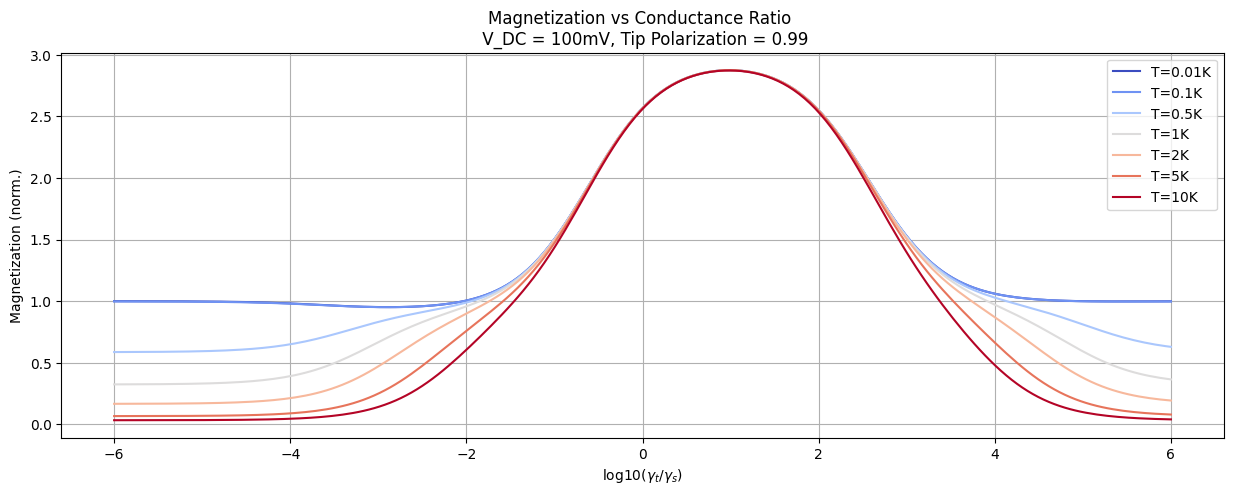

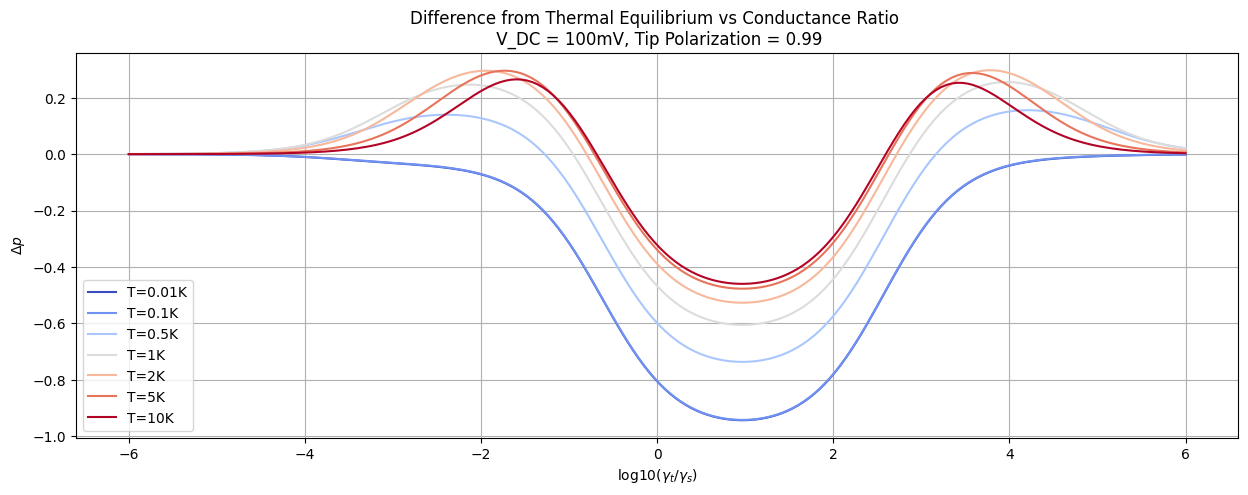

In [18]:
# Calculate the Magnetization and Difference from thermal population as a function of the conductance ratio
# Voltage and Tip-Polarization are fixed

# Setting the tunneling Parameters
S.G_ss = [1,1]
S.V_DC = 100
#S.T = 0.5
S.TipPolarization = [0, 0, 0.99]
S.U = [0,0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

# Initializing the Arrays
N=200
R_exponent=np.linspace(-6,6,N)
temperatures = [0.01,0.1,0.5,1,2,5,10]
M = np.zeros((len(temperatures),len(R_exponent)))
thermal_diff = np.zeros((len(temperatures),len(R_exponent)))

# Create Nice colors for the different Temperatures
colors = plt.cm.coolwarm(np.linspace(0, 1, len(temperatures)))[:, :3]

# Calculating the Magnetization and Difference from thermal population
for i in range(len(temperatures)):
    S.T = temperatures[i]
    for g in range(len(R_exponent)):
        S.G = 10**R_exponent[g]*S.G_ss[0]
        S.calcRates()
        S.calcMagnetization()
        #M[i,g] = (S.Populations[0] - S.Populations[1])
        M[i,g] = S.Mag
        thermal_diff[i,g] = -(S.p0[0] - S.Populations[0])
        

# Plotting the Magnetization for different Temperatures
plt.figure(figsize=(15, 5))
for i in range(len(temperatures)):
    plt.plot(R_exponent, M[i,:], color=colors[i,:], label=f'T={temperatures[i]}K')
#plt.ylim([-1, 1])
plt.title(f'Magnetization vs Conductance Ratio \n V_DC = {S.V_DC}mV, Tip Polarization = {S.TipPolarization[2]}')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel('Magnetization (norm.)')
plt.legend()
plt.grid()
plt.show()

# Plotting the Difference of thermal Population for different Temperatures
plt.figure(figsize=(15, 5))
for i in range(len(temperatures)):
    plt.plot(R_exponent, thermal_diff[i,:], color=colors[i,:], label=f'T={temperatures[i]}K')
plt.title(f'Difference from Thermal Equilibrium vs Conductance Ratio \n V_DC = {S.V_DC}mV, Tip Polarization = {S.TipPolarization[2]}')
plt.xlabel(r'log10($\gamma_t / \gamma_s$)')
plt.ylabel(r'$\Delta p$')
plt.legend()
plt.grid()
plt.show()


### Heat Map

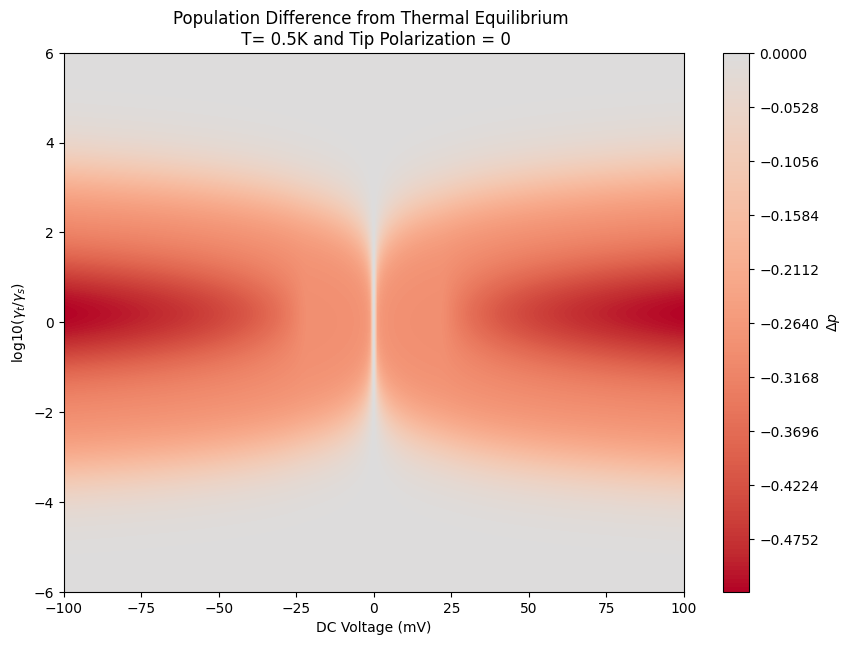

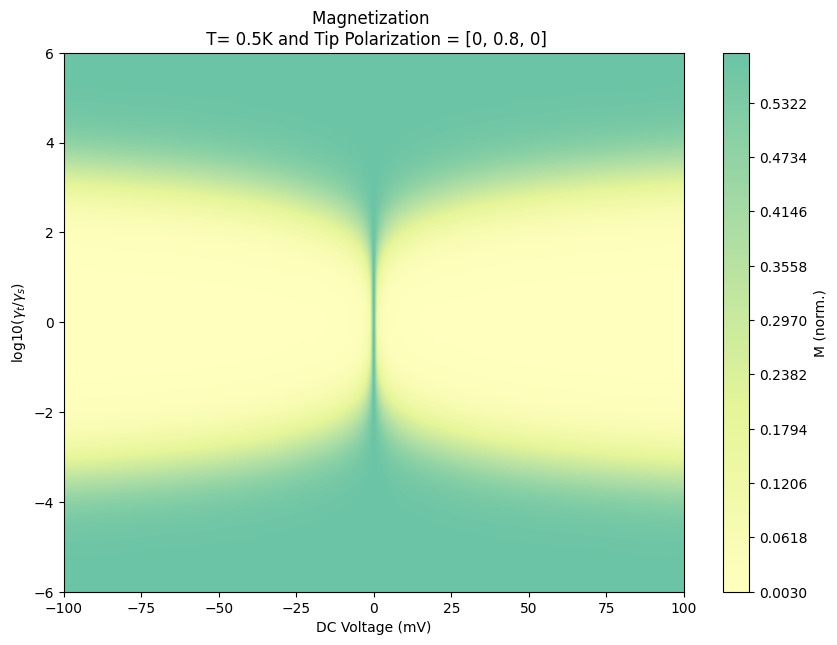

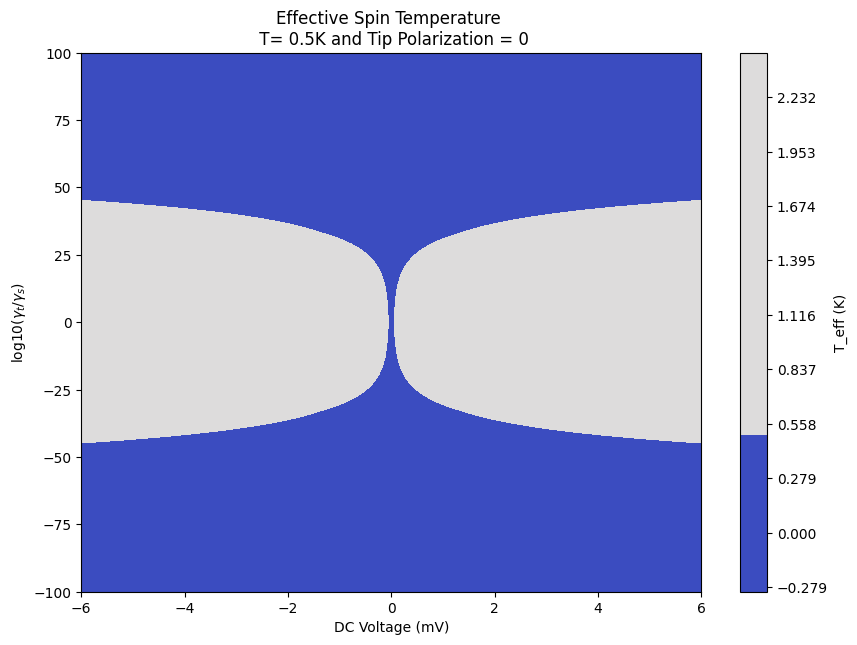

In [46]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

# Setting the tunneling Parameters
S.ReadoutSpin = 0
S.G_ss = [1,1]
#S.V_DC = -100
S.T = 0.5
S.TipPolarization = [0, 0.8, 0]
S.U = [0,0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

# Define the range for the conductance ratio exponent
N=201;
R_exponent = np.linspace(-6, 6, N)
V_DC_range = np.linspace(-100, 100, N)
M = np.zeros((len(V_DC_range), len(R_exponent)))
thermal_diff = np.zeros((len(V_DC_range), len(R_exponent)))
T_eff = np.zeros((len(V_DC_range), len(R_exponent)))

# Loop over the DC voltage range and conductance ratio to calculate the population differences
for v_idx in range(len(V_DC_range)):
    S.V_DC = V_DC_range[v_idx]  # Set the DC voltage
    for r_idx in range(len(R_exponent)):
        S.G = 10**R_exponent[r_idx]*S.G_ss[0]  # Set the conductance ratio
        S.calcRates()  # Calculate the rates
        S.calcMagnetization()
        #M[r_idx, v_idx] = S.Populations[0] - S.Populations[1]  # Calculate the population difference
        M[r_idx, v_idx] = S.Mag
        thermal_diff[r_idx, v_idx] = -(S.p0[0] - S.Populations[0])  # Calculate the population difference of the ground state from thermal equilibrium
        T_eff[r_idx, v_idx] = np.abs(S.E_All[1]/(S.kB*np.log(S.Populations[0]/S.Populations[1])))

# Custom colormap
tmin, t0, tmax = sorted([T_eff.min(), S.T, T_eff.max()])
pmin, p0, pmax = sorted([thermal_diff.min(), 0, thermal_diff.max()])
#mmin, m0, mmax = sorted([M.min(), (S.p0[0]-S.p0[1]), M.max()])
mmin, m0, mmax = sorted([-3, 0, 3])
norm_th = TwoSlopeNorm(vmin=pmin, vcenter=p0, vmax=pmax)
norm_m = TwoSlopeNorm(vmin=mmin, vcenter=m0, vmax=mmax)
norm_T = TwoSlopeNorm(vmin=tmin, vcenter=t0, vmax=tmax)


# Plot the colormap of the Difference from Thermal Equilibrium
plt.figure(figsize=(10, 7))
plt.contourf(V_DC_range, R_exponent, thermal_diff, cmap='coolwarm_r', levels=256*4,norm=norm_th)
plt.colorbar(label=r'$\Delta p$')
plt.title(f'Population Difference from Thermal Equilibrium \n T= {S.T}K and Tip Polarization = {S.TipPolarization[2]}')
plt.ylabel(r'log10($\gamma_t / \gamma_s$)')
plt.xlabel('DC Voltage (mV)')
plt.show()

# Plot the colormap of the Magnetization
plt.figure(figsize=(10, 7))
contour=plt.contourf(V_DC_range, R_exponent, M, cmap='Spectral', levels=256*4,norm=Normalize(vmin=-1, vmax=1))
# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('M (norm.)')
#cbar.set_ticks(np.linspace(-1, 1, 11))
plt.title(f'Magnetization \n T= {S.T}K and Tip Polarization = {S.TipPolarization}')
plt.ylabel(r'log10($\gamma_t / \gamma_s$)')
plt.xlabel('DC Voltage (mV)')
plt.show()

# Plot the colormap of the Effective Spin Temperature
plt.figure(figsize=(10, 7))
plt.contourf(R_exponent, V_DC_range, np.log10(T_eff), cmap='coolwarm', levels=256*4,norm=norm_T)
plt.colorbar(label='T_eff (K)')
plt.title(f'Effective Spin Temperature \n T= {S.T}K and Tip Polarization = {S.TipPolarization[2]}')
plt.ylabel(r'log10($\gamma_t / \gamma_s$)')
plt.xlabel('DC Voltage (mV)')
plt.show()

### Plot partial Magnetizations 

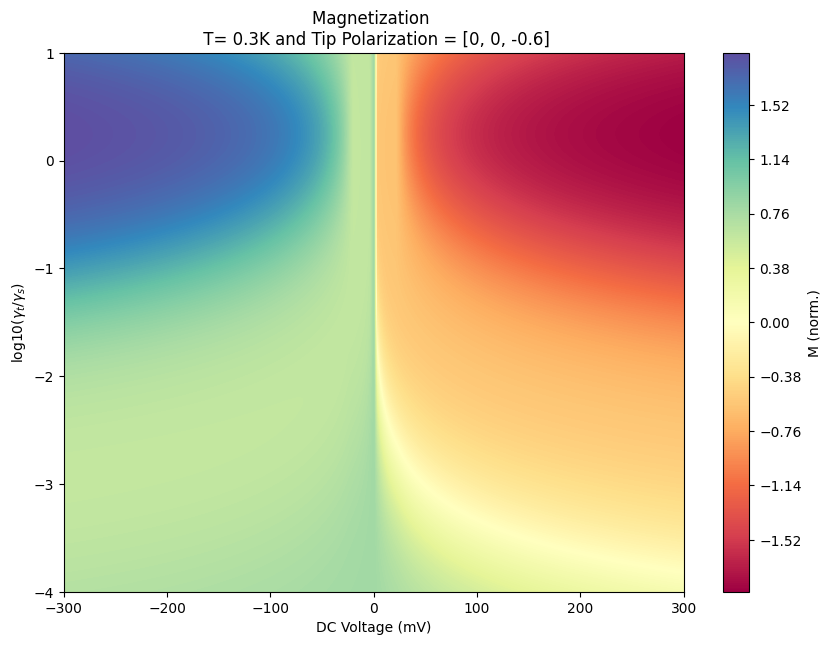

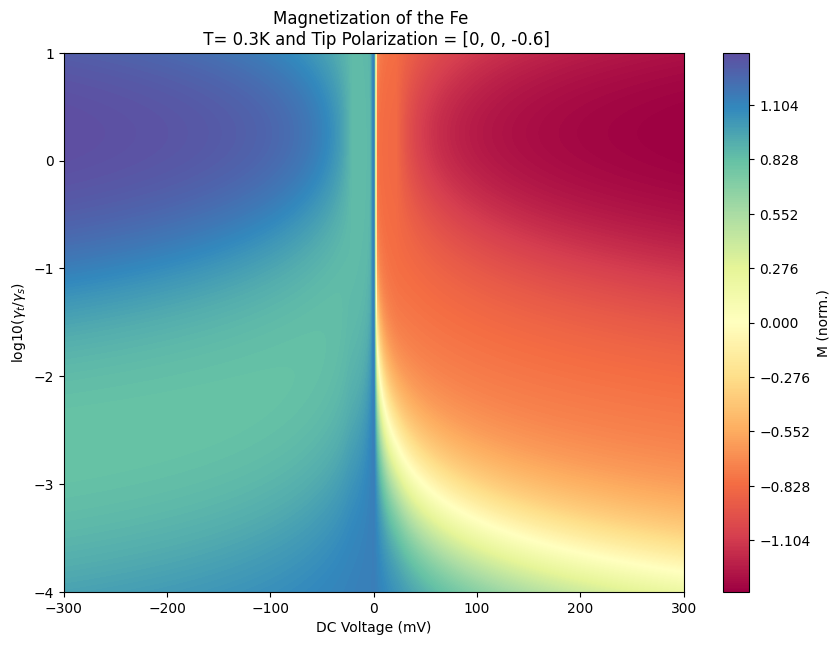

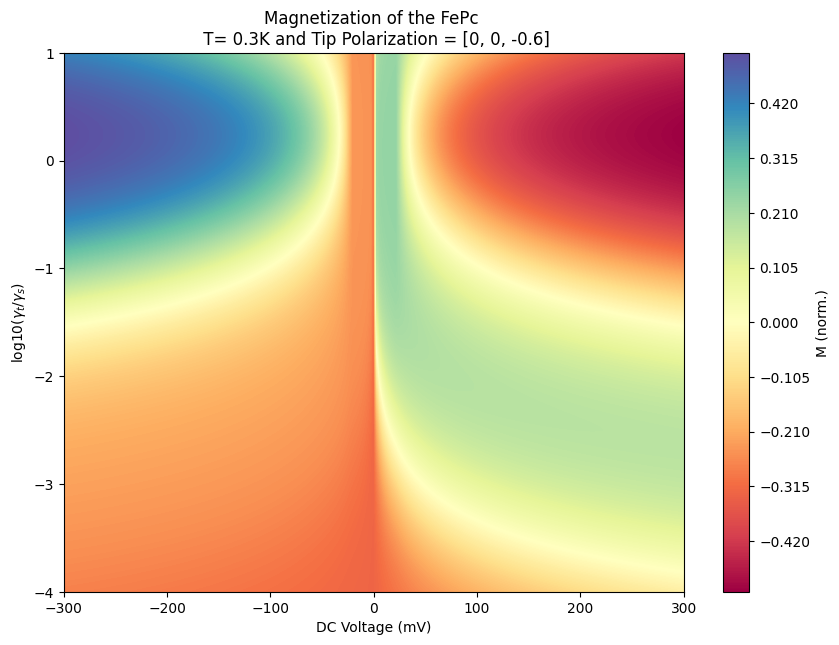

In [86]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

# Setting the tunneling Parameters
S.ReadoutSpin = 0
S.G_ss = [1,1]
#S.V_DC = -100
S.T = 0.3
S.TipPolarization = [0, 0, -0.6]
S.U = [0,0] #has no influnece
S.G_tt = 1 #Allowing tip-tip scattering

# Define the range for the conductance ratio exponent
N=201;
R_exponent = np.linspace(-4, 1, N)
V_DC_range = np.linspace(-300, 300, N)
M = np.zeros((len(V_DC_range), len(R_exponent)))
M_Fe = np.zeros((len(V_DC_range), len(R_exponent)))
M_FePc = np.zeros((len(V_DC_range), len(R_exponent)))


# Loop over the DC voltage range and conductance ratio to calculate the population differences
for v_idx in range(len(V_DC_range)):
    S.V_DC = V_DC_range[v_idx]  # Set the DC voltage
    for r_idx in range(len(R_exponent)):
        S.G = 10**R_exponent[r_idx]*S.G_ss[0]  # Set the conductance ratio
        S.calcRates()  # Calculate the rates
        S.calcMagnetization()
        S.calcMagnetization_part()
        #M[r_idx, v_idx] = S.Populations[0] - S.Populations[1]  # Calculate the population difference
        M[r_idx, v_idx] = S.Mag
        M_Fe[r_idx, v_idx] = S.Mag_part[0]
        M_FePc[r_idx, v_idx] = S.Mag_part[1]

# Custom colormap
# tmin, t0, tmax = sorted([T_eff.min(), S.T, T_eff.max()])
# pmin, p0, pmax = sorted([thermal_diff.min(), 0, thermal_diff.max()])
# #mmin, m0, mmax = sorted([M.min(), (S.p0[0]-S.p0[1]), M.max()])
# mmin, m0, mmax = sorted([-3, 0, 3])
# norm_th = TwoSlopeNorm(vmin=pmin, vcenter=p0, vmax=pmax)
# norm_m = TwoSlopeNorm(vmin=mmin, vcenter=m0, vmax=mmax)
# norm_T = TwoSlopeNorm(vmin=tmin, vcenter=t0, vmax=tmax)




# Plot the colormap of the Total Magnetization
plt.figure(figsize=(10, 7))
contour=plt.contourf(V_DC_range, R_exponent, M, cmap='Spectral', levels=256*4)
# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('M (norm.)')
#cbar.set_ticks(np.linspace(-1, 1, 11))
plt.title(f'Magnetization \n T= {S.T}K and Tip Polarization = {S.TipPolarization}')
plt.ylabel(r'log10($\gamma_t / \gamma_s$)')
plt.xlabel('DC Voltage (mV)')
plt.show()

# Plot the colormap of the Effective Spin Temperature
plt.figure(figsize=(10, 7))
contour=plt.contourf(V_DC_range, R_exponent, M_Fe, cmap='Spectral', levels=256*4)
# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('M (norm.)')
#cbar.set_ticks(np.linspace(-1, 1, 11))
plt.title(f'Magnetization of the Fe \n T= {S.T}K and Tip Polarization = {S.TipPolarization}')
plt.ylabel(r'log10($\gamma_t / \gamma_s$)')
plt.xlabel('DC Voltage (mV)')
plt.show()

plt.figure(figsize=(10, 7))
contour=plt.contourf(V_DC_range, R_exponent, M_FePc, cmap='Spectral', levels=256*4)
# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('M (norm.)')
#cbar.set_ticks(np.linspace(-1, 1, 11))
plt.title(f'Magnetization of the FePc \n T= {S.T}K and Tip Polarization = {S.TipPolarization}')
plt.ylabel(r'log10($\gamma_t / \gamma_s$)')
plt.xlabel('DC Voltage (mV)')
plt.show()

In [69]:
S.T=0.01
S.V_DC = 0
S.calcRates()
S.calcMagnetization()
S.calcMagnetization_part()
print(S.Mag*1.5)
print(S.Mag_part[0]*1+S.Mag_part[1]*0.5)
#print(np.sum(S.Mag_part))

0.5000001702997
0.5000001712971909


c:\Users\philou\Desktop\ESR-Simulation\EfieldPaper_SpinPumpingExplanation\..\ESR_STM_SpinSimulation.py:712: RuntimeWarning: overflow encountered in exp
  RateIntegrals[i, j] = abs((delta_E - V_DC) / (np.exp((delta_E - V_DC) / (self.kB * self.T)) - 1))
c:\Users\philou\Desktop\ESR-Simulation\EfieldPaper_SpinPumpingExplanation\..\ESR_STM_SpinSimulation.py:714: RuntimeWarning: overflow encountered in exp
  RateIntegrals[i, j] = abs((delta_E + V_DC) / (np.exp((delta_E + V_DC) / (self.kB * self.T)) - 1))
c:\Users\philou\Desktop\ESR-Simulation\EfieldPaper_SpinPumpingExplanation\..\ESR_STM_SpinSimulation.py:716: RuntimeWarning: invalid value encountered in scalar divide
  RateIntegrals[i, j] = abs(delta_E / (np.exp(delta_E / (self.kB * self.T)) - 1))
c:\Users\philou\Desktop\ESR-Simulation\EfieldPaper_SpinPumpingExplanation\..\ESR_STM_SpinSimulation.py:716: RuntimeWarning: overflow encountered in exp
  RateIntegrals[i, j] = abs(delta_E / (np.exp(delta_E / (self.kB * self.T)) - 1))


In [81]:
0.3e-6*0.3e-6/(77.5e-6)


1.1612903225806451e-09